**Import Libraries**

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [186]:
SEED = 23

**Importing Data**

In [187]:
df = pd.read_csv("Dataset_Final_500.csv", encoding='latin1')
df

,DOI,Material 1,Material 2,Current density(A/g),SSA\n m^2/g,Vt\n (cm^3/g),Cell Configuration,Electrode Configuration,Rs,Potential Window(V),Electrolyte,Electrolyte Concetration(M),Scan rate(mV/s),Specific Capacitance(F/g)
0,http://dx.doi.org/10.1016/S1452-3981(23)14018-1,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,1.67,23.34
1,http://dx.doi.org/10.1016/S1452-3981(23)14018-1,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,2.59,19.39
2,http://dx.doi.org/10.1016/S1452-3981(23)14018-1,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,5,16.19
3,http://dx.doi.org/10.1016/S1452-3981(23)14018-1,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,8.09,15.13
4,http://dx.doi.org/10.1016/S1452-3981(23)14018-1,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,11.19,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,http://dx.doi.org/10.1016/j.jpowsour.2015.01.159,CNT,Carbon Foam,157.05,230.4,0.23,N-CNT/CF3,N-CNTs/CF3 electrode,0.7,"(-1, 0)",KOH,6,20,45.76
546,http://dx.doi.org/10.1016/j.jpowsour.2015.01.159,CNT,Carbon Foam,168.21,230.4,0.23,N-CNT/CF3,N-CNTs/CF3 electrode,0.7,"(-1, 0)",KOH,6,20,44.73
547,http://dx.doi.org/10.1016/j.jpowsour.2015.01.159,CNT,Carbon Foam,179.38,230.4,0.23,N-CNT/CF3,N-CNTs/CF3 electrode,0.7,"(-1, 0)",KOH,6,20,43.69
548,http://dx.doi.org/10.1016/j.jpowsour.2015.01.159,CNT,Carbon Foam,190.54,230.4,0.23,N-CNT/CF3,N-CNTs/CF3 electrode,0.7,"(-1, 0)",KOH,6,20,42.66


**Cleaning Data**

In [188]:
print(df.columns)

Index(['DOI', 'Material 1', 'Material 2', 'Current density(A/g)',
       ' SSA\n m^2/g', ' Vt\n (cm^3/g)', 'Cell Configuration',
       'Electrode Configuration', 'Rs', 'Potential Window(V)', 'Electrolyte',
       'Electrolyte Concetration(M)', 'Scan rate(mV/s)',
       'Specific Capacitance(F/g)'],
      dtype='object')


In [189]:
df.columns = df.columns.str.strip()

In [190]:
df = df.rename(columns={
    'SSA\n m^2/g': 'SSA',
    'Vt\n (cm^3/g)': 'Vt',
    'Specific Capacitance(F/g)': 'Specific_Capacitance',
    'Scan rate(mV/s)': 'Scan_rate',
    'Potential Window(V)': 'Potential_Window',
    'Electrolyte Concetration(M)': 'Electrolyte_Concentration',
    'Current density(A/g)': 'Current_density'
})
df = df.drop('DOI', axis=1)

In [191]:
print(df.columns)

Index(['Material 1', 'Material 2', 'Current_density', 'SSA', 'Vt',
       'Cell Configuration', 'Electrode Configuration', 'Rs',
       'Potential_Window', 'Electrolyte', 'Electrolyte_Concentration',
       'Scan_rate', 'Specific_Capacitance'],
      dtype='object')


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Material 1                 550 non-null    object 
 1   Material 2                 550 non-null    object 
 2   Current_density            550 non-null    object 
 3   SSA                        550 non-null    float64
 4   Vt                         550 non-null    object 
 5   Cell Configuration         550 non-null    object 
 6   Electrode Configuration    550 non-null    object 
 7   Rs                         550 non-null    float64
 8   Potential_Window           550 non-null    object 
 9   Electrolyte                550 non-null    object 
 10  Electrolyte_Concentration  550 non-null    int64  
 11  Scan_rate                  550 non-null    object 
 12  Specific_Capacitance       550 non-null    float64
dtypes: float64(3), int64(1), object(9)
memory usage: 5

**Checking for Null Values**

In [193]:
df.isnull()

,Material 1,Material 2,Current_density,SSA,Vt,Cell Configuration,Electrode Configuration,Rs,Potential_Window,Electrolyte,Electrolyte_Concentration,Scan_rate,Specific_Capacitance
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False,False,False,False,False,False,False


In [194]:
df.isnull().sum()

,0
Material 1,0
Material 2,0
Current_density,0
SSA,0
Vt,0
Cell Configuration,0
Electrode Configuration,0
Rs,0
Potential_Window,0
Electrolyte,0


In [195]:
df.isnull().sum().sum()

0

In [196]:
df2 = df.fillna(value = 0)
df2

,Material 1,Material 2,Current_density,SSA,Vt,Cell Configuration,Electrode Configuration,Rs,Potential_Window,Electrolyte,Electrolyte_Concentration,Scan_rate,Specific_Capacitance
0,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,1.67,23.34
1,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,2.59,19.39
2,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,5,16.19
3,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,8.09,15.13
4,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,11.19,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,CNT,Carbon Foam,157.05,230.4,0.23,N-CNT/CF3,N-CNTs/CF3 electrode,0.7,"(-1, 0)",KOH,6,20,45.76
546,CNT,Carbon Foam,168.21,230.4,0.23,N-CNT/CF3,N-CNTs/CF3 electrode,0.7,"(-1, 0)",KOH,6,20,44.73
547,CNT,Carbon Foam,179.38,230.4,0.23,N-CNT/CF3,N-CNTs/CF3 electrode,0.7,"(-1, 0)",KOH,6,20,43.69
548,CNT,Carbon Foam,190.54,230.4,0.23,N-CNT/CF3,N-CNTs/CF3 electrode,0.7,"(-1, 0)",KOH,6,20,42.66


In [197]:
df2.isnull().sum().sum()

0

In [198]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Material 1                 550 non-null    object 
 1   Material 2                 550 non-null    object 
 2   Current_density            550 non-null    object 
 3   SSA                        550 non-null    float64
 4   Vt                         550 non-null    object 
 5   Cell Configuration         550 non-null    object 
 6   Electrode Configuration    550 non-null    object 
 7   Rs                         550 non-null    float64
 8   Potential_Window           550 non-null    object 
 9   Electrolyte                550 non-null    object 
 10  Electrolyte_Concentration  550 non-null    int64  
 11  Scan_rate                  550 non-null    object 
 12  Specific_Capacitance       550 non-null    float64
dtypes: float64(3), int64(1), object(9)
memory usage: 5

In [199]:
df2.describe()

,SSA,Rs,Electrolyte_Concentration,Specific_Capacitance
count,550.000000,550.000000,550.000000,550.000000
mean,841.389273,7.456982,3.963636,299.640430
std,626.964311,21.440365,2.458868,536.312867
min,198.000000,0.100000,1.000000,8.080000
25%,415.000000,0.690000,1.000000,66.552500
50%,675.000000,1.070000,6.000000,141.549098
75%,1244.000000,1.070000,6.000000,224.407500
max,2856.000000,100.000000,6.000000,2906.950000


In [200]:
df2.head()

,Material 1,Material 2,Current_density,SSA,Vt,Cell Configuration,Electrode Configuration,Rs,Potential_Window,Electrolyte,Electrolyte_Concentration,Scan_rate,Specific_Capacitance
0,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,1.67,23.34
1,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,2.59,19.39
2,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,5,16.19
3,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,8.09,15.13
4,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,11.19,14.73


In [201]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
SSA,550.0,841.389273,626.964311,198.00,415.0000,675.000000,1244.0000,2856.00
Rs,550.0,7.456982,21.440365,0.10,0.6900,1.070000,1.0700,100.00
Electrolyte_Concentration,550.0,3.963636,2.458868,1.00,1.0000,6.000000,6.0000,6.00
Specific_Capacitance,550.0,299.640430,536.312867,8.08,66.5525,141.549098,224.4075,2906.95


In [202]:
df.head()

,Material 1,Material 2,Current_density,SSA,Vt,Cell Configuration,Electrode Configuration,Rs,Potential_Window,Electrolyte,Electrolyte_Concentration,Scan_rate,Specific_Capacitance
0,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,1.67,23.34
1,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,2.59,19.39
2,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,5,16.19
3,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,8.09,15.13
4,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,11.19,14.73


In [203]:
df['Current_density'] = df['Current_density'].str.replace('between', '(', regex=False)
df['Current_density'] = df['Current_density'].str.replace('to', ',', regex=False)


In [204]:
df.head()

,Material 1,Material 2,Current_density,SSA,Vt,Cell Configuration,Electrode Configuration,Rs,Potential_Window,Electrolyte,Electrolyte_Concentration,Scan_rate,Specific_Capacitance
0,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,1.67,23.34
1,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,2.59,19.39
2,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,5,16.19
3,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,8.09,15.13
4,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,11.19,14.73


In [205]:
df

,Material 1,Material 2,Current_density,SSA,Vt,Cell Configuration,Electrode Configuration,Rs,Potential_Window,Electrolyte,Electrolyte_Concentration,Scan_rate,Specific_Capacitance
0,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,1.67,23.34
1,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,2.59,19.39
2,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,5,16.19
3,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,8.09,15.13
4,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,11.19,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,CNT,Carbon Foam,157.05,230.4,0.23,N-CNT/CF3,N-CNTs/CF3 electrode,0.7,"(-1, 0)",KOH,6,20,45.76
546,CNT,Carbon Foam,168.21,230.4,0.23,N-CNT/CF3,N-CNTs/CF3 electrode,0.7,"(-1, 0)",KOH,6,20,44.73
547,CNT,Carbon Foam,179.38,230.4,0.23,N-CNT/CF3,N-CNTs/CF3 electrode,0.7,"(-1, 0)",KOH,6,20,43.69
548,CNT,Carbon Foam,190.54,230.4,0.23,N-CNT/CF3,N-CNTs/CF3 electrode,0.7,"(-1, 0)",KOH,6,20,42.66


In [206]:
def split_range(row):
    # Remove parentheses and split by comma
    cleaned = row.replace('(', '').replace(')', '').split(',')
    # Return start and end as a tuple
    return pd.Series([float(cleaned[0]), float(cleaned[-1])])

# Apply the function to split the range
df[['PW_range_start', 'PW_range_end']] = df['Potential_Window'].apply(split_range)

# Display the resulting DataFrame
print(df)


    Material 1                           Material 2 Current_density    SSA  \
0          CNT  Activated Carbon Monoliths at  600C  (-0.18, 0.18)   434.0   
1          CNT  Activated Carbon Monoliths at  600C  (-0.18, 0.18)   434.0   
2          CNT  Activated Carbon Monoliths at  600C  (-0.18, 0.18)   434.0   
3          CNT  Activated Carbon Monoliths at  600C  (-0.18, 0.18)   434.0   
4          CNT  Activated Carbon Monoliths at  600C  (-0.18, 0.18)   434.0   
..         ...                                  ...             ...    ...   
545        CNT                          Carbon Foam          157.05  230.4   
546        CNT                          Carbon Foam          168.21  230.4   
547        CNT                          Carbon Foam          179.38  230.4   
548        CNT                          Carbon Foam          190.54  230.4   
549        CNT                          Carbon Foam             199  230.4   

         Vt                Cell Configuration  \
0    0.2489  S

In [207]:
df

,Material 1,Material 2,Current_density,SSA,Vt,Cell Configuration,Electrode Configuration,Rs,Potential_Window,Electrolyte,Electrolyte_Concentration,Scan_rate,Specific_Capacitance,PW_range_start,PW_range_end
0,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,1.67,23.34,0.0,1.0
1,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,2.59,19.39,0.0,1.0
2,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,5,16.19,0.0,1.0
3,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,8.09,15.13,0.0,1.0
4,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,"(0, 1)",H2SO4,1,11.19,14.73,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,CNT,Carbon Foam,157.05,230.4,0.23,N-CNT/CF3,N-CNTs/CF3 electrode,0.7,"(-1, 0)",KOH,6,20,45.76,-1.0,0.0
546,CNT,Carbon Foam,168.21,230.4,0.23,N-CNT/CF3,N-CNTs/CF3 electrode,0.7,"(-1, 0)",KOH,6,20,44.73,-1.0,0.0
547,CNT,Carbon Foam,179.38,230.4,0.23,N-CNT/CF3,N-CNTs/CF3 electrode,0.7,"(-1, 0)",KOH,6,20,43.69,-1.0,0.0
548,CNT,Carbon Foam,190.54,230.4,0.23,N-CNT/CF3,N-CNTs/CF3 electrode,0.7,"(-1, 0)",KOH,6,20,42.66,-1.0,0.0


In [208]:
df = df.drop('Potential_Window', axis=1)

In [209]:
df

,Material 1,Material 2,Current_density,SSA,Vt,Cell Configuration,Electrode Configuration,Rs,Electrolyte,Electrolyte_Concentration,Scan_rate,Specific_Capacitance,PW_range_start,PW_range_end
0,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,H2SO4,1,1.67,23.34,0.0,1.0
1,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,H2SO4,1,2.59,19.39,0.0,1.0
2,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,H2SO4,1,5,16.19,0.0,1.0
3,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,H2SO4,1,8.09,15.13,0.0,1.0
4,CNT,Activated Carbon Monoliths at 600C,"(-0.18, 0.18)",434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,H2SO4,1,11.19,14.73,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,CNT,Carbon Foam,157.05,230.4,0.23,N-CNT/CF3,N-CNTs/CF3 electrode,0.7,KOH,6,20,45.76,-1.0,0.0
546,CNT,Carbon Foam,168.21,230.4,0.23,N-CNT/CF3,N-CNTs/CF3 electrode,0.7,KOH,6,20,44.73,-1.0,0.0
547,CNT,Carbon Foam,179.38,230.4,0.23,N-CNT/CF3,N-CNTs/CF3 electrode,0.7,KOH,6,20,43.69,-1.0,0.0
548,CNT,Carbon Foam,190.54,230.4,0.23,N-CNT/CF3,N-CNTs/CF3 electrode,0.7,KOH,6,20,42.66,-1.0,0.0


In [210]:
def split_range(row):
    # Remove parentheses and split by comma
    cleaned = row.replace('(', '').replace(')', '').split(',')
    # Return start and end as a tuple
    return pd.Series([float(cleaned[0]), float(cleaned[-1])])

# Apply the function to split the range
df[['CD_range_start', 'CD_range_end']] = df['Current_density'].apply(split_range)

# Display the resulting DataFrame
print(df)


    Material 1                           Material 2 Current_density    SSA  \
0          CNT  Activated Carbon Monoliths at  600C  (-0.18, 0.18)   434.0   
1          CNT  Activated Carbon Monoliths at  600C  (-0.18, 0.18)   434.0   
2          CNT  Activated Carbon Monoliths at  600C  (-0.18, 0.18)   434.0   
3          CNT  Activated Carbon Monoliths at  600C  (-0.18, 0.18)   434.0   
4          CNT  Activated Carbon Monoliths at  600C  (-0.18, 0.18)   434.0   
..         ...                                  ...             ...    ...   
545        CNT                          Carbon Foam          157.05  230.4   
546        CNT                          Carbon Foam          168.21  230.4   
547        CNT                          Carbon Foam          179.38  230.4   
548        CNT                          Carbon Foam          190.54  230.4   
549        CNT                          Carbon Foam             199  230.4   

         Vt                Cell Configuration  \
0    0.2489  S

In [211]:
df.drop(['Current_density'],axis = 1)

,Material 1,Material 2,SSA,Vt,Cell Configuration,Electrode Configuration,Rs,Electrolyte,Electrolyte_Concentration,Scan_rate,Specific_Capacitance,PW_range_start,PW_range_end,CD_range_start,CD_range_end
0,CNT,Activated Carbon Monoliths at 600C,434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,H2SO4,1,1.67,23.34,0.0,1.0,-0.18,0.18
1,CNT,Activated Carbon Monoliths at 600C,434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,H2SO4,1,2.59,19.39,0.0,1.0,-0.18,0.18
2,CNT,Activated Carbon Monoliths at 600C,434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,H2SO4,1,5,16.19,0.0,1.0,-0.18,0.18
3,CNT,Activated Carbon Monoliths at 600C,434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,H2SO4,1,8.09,15.13,0.0,1.0,-0.18,0.18
4,CNT,Activated Carbon Monoliths at 600C,434.0,0.2489,Symmetrical supercapacitor cells,ACM electrodes with 316L stainless steel as cu...,0.8,H2SO4,1,11.19,14.73,0.0,1.0,-0.18,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,CNT,Carbon Foam,230.4,0.23,N-CNT/CF3,N-CNTs/CF3 electrode,0.7,KOH,6,20,45.76,-1.0,0.0,157.05,157.05
546,CNT,Carbon Foam,230.4,0.23,N-CNT/CF3,N-CNTs/CF3 electrode,0.7,KOH,6,20,44.73,-1.0,0.0,168.21,168.21
547,CNT,Carbon Foam,230.4,0.23,N-CNT/CF3,N-CNTs/CF3 electrode,0.7,KOH,6,20,43.69,-1.0,0.0,179.38,179.38
548,CNT,Carbon Foam,230.4,0.23,N-CNT/CF3,N-CNTs/CF3 electrode,0.7,KOH,6,20,42.66,-1.0,0.0,190.54,190.54


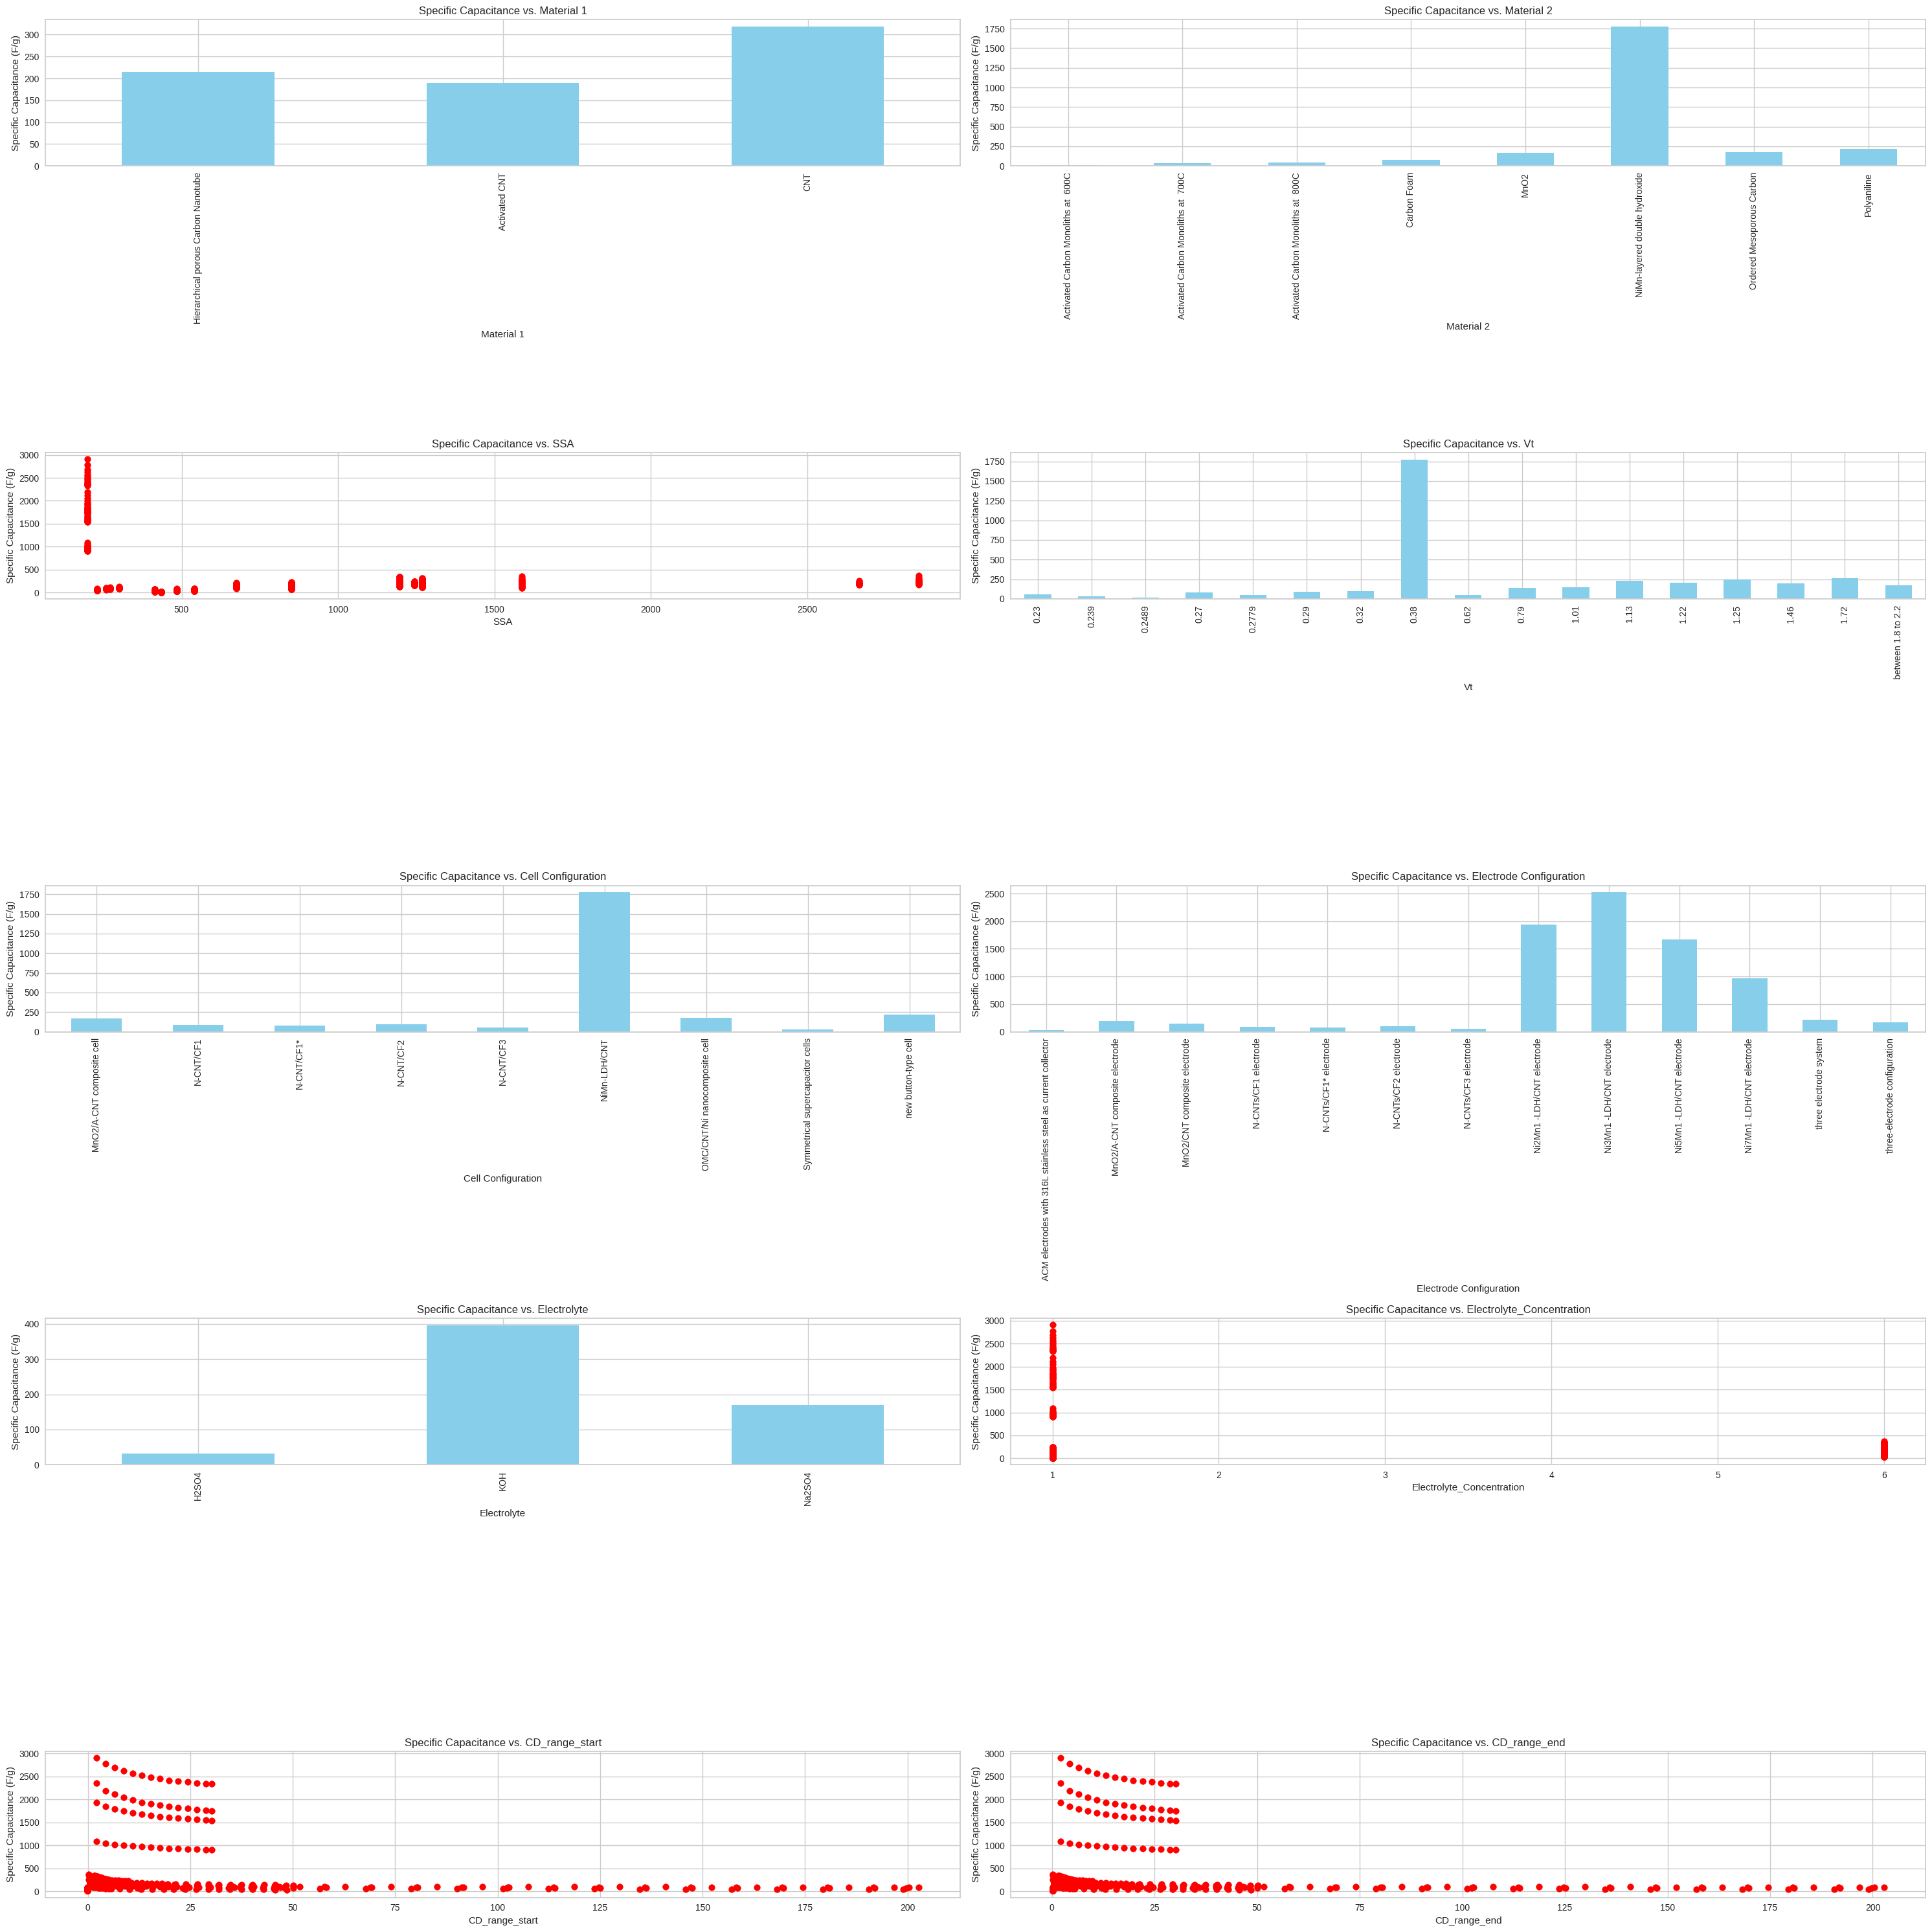

In [212]:
# List of columns to plot against "Specific Capacitance"
columns_to_plot = [
    'Material 1', 'Material 2', 'SSA', 'Vt', 'Cell Configuration',
    'Electrode Configuration', 'Electrolyte', 'Electrolyte_Concentration',
     'CD_range_start', 'CD_range_end'
]

# Create subplots for all columns
fig, axes = plt.subplots(5, 2, figsize=(30, 30))
axes = axes.flatten()

# Plot each column
for i, col in enumerate(columns_to_plot):
    if df[col].dtype == 'object':  # Handle categorical columns
        df.groupby(col)['Specific_Capacitance'].mean().plot(kind='bar', ax=axes[i], color='skyblue')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Specific Capacitance (F/g)')
        axes[i].set_title(f'Specific Capacitance vs. {col}')
    else:  # Handle numerical columns
        axes[i].scatter(df[col], df['Specific_Capacitance'], color='red')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Specific Capacitance (F/g)')
        axes[i].set_title(f'Specific Capacitance vs. {col}')

# Remove extra subplots if any
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [213]:
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col, encoder in label_encoders.items():
    df[col] = encoder.fit_transform(df[col].astype(str))

In [214]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Apply MinMaxScaler
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the scaled DataFrame
print("Scaled DataFrame:")
print(df_scaled)
df_scaled = df

Scaled DataFrame:
     Material 1  Material 2  Current_density       SSA     Vt  \
0           1.0    0.000000         0.002933  0.088789  0.125   
1           1.0    0.000000         0.002933  0.088789  0.125   
2           1.0    0.000000         0.002933  0.088789  0.125   
3           1.0    0.000000         0.002933  0.088789  0.125   
4           1.0    0.000000         0.002933  0.088789  0.125   
..          ...         ...              ...       ...    ...   
545         1.0    0.428571         0.225806  0.012190  0.000   
546         1.0    0.428571         0.243402  0.012190  0.000   
547         1.0    0.428571         0.260997  0.012190  0.000   
548         1.0    0.428571         0.293255  0.012190  0.000   
549         1.0    0.428571         0.304985  0.012190  0.000   

     Cell Configuration  Electrode Configuration        Rs  Electrolyte  \
0                 0.875                      0.0  0.007007          0.0   
1                 0.875                      0.0  0

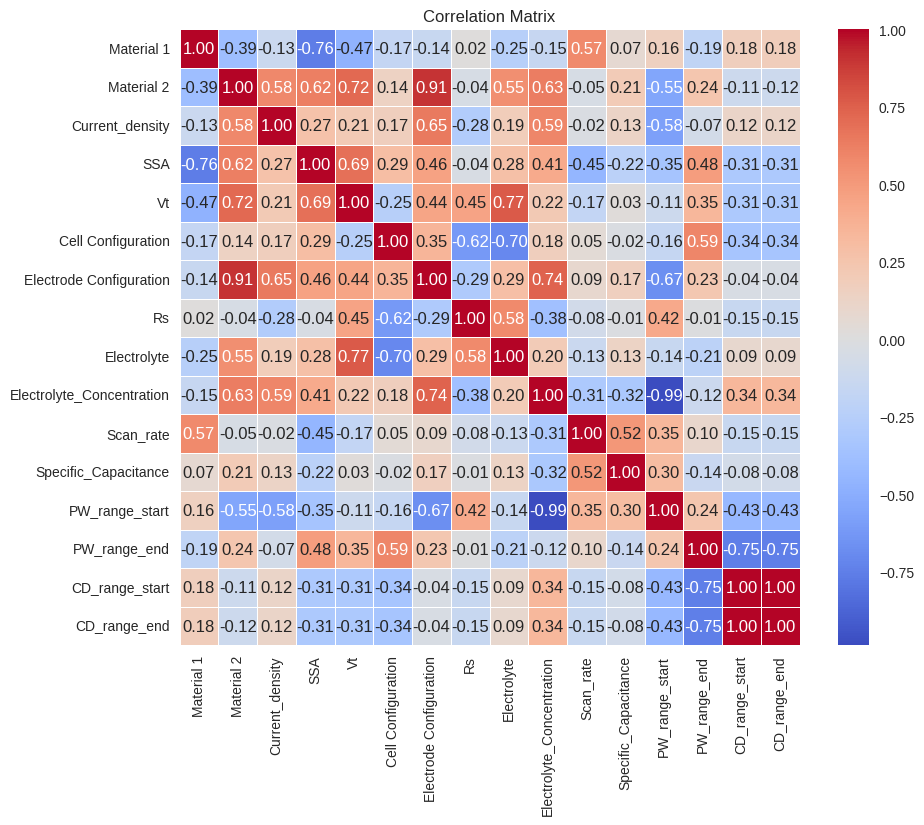

In [215]:
correlation_matrix = df.corr()

# Step 2: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

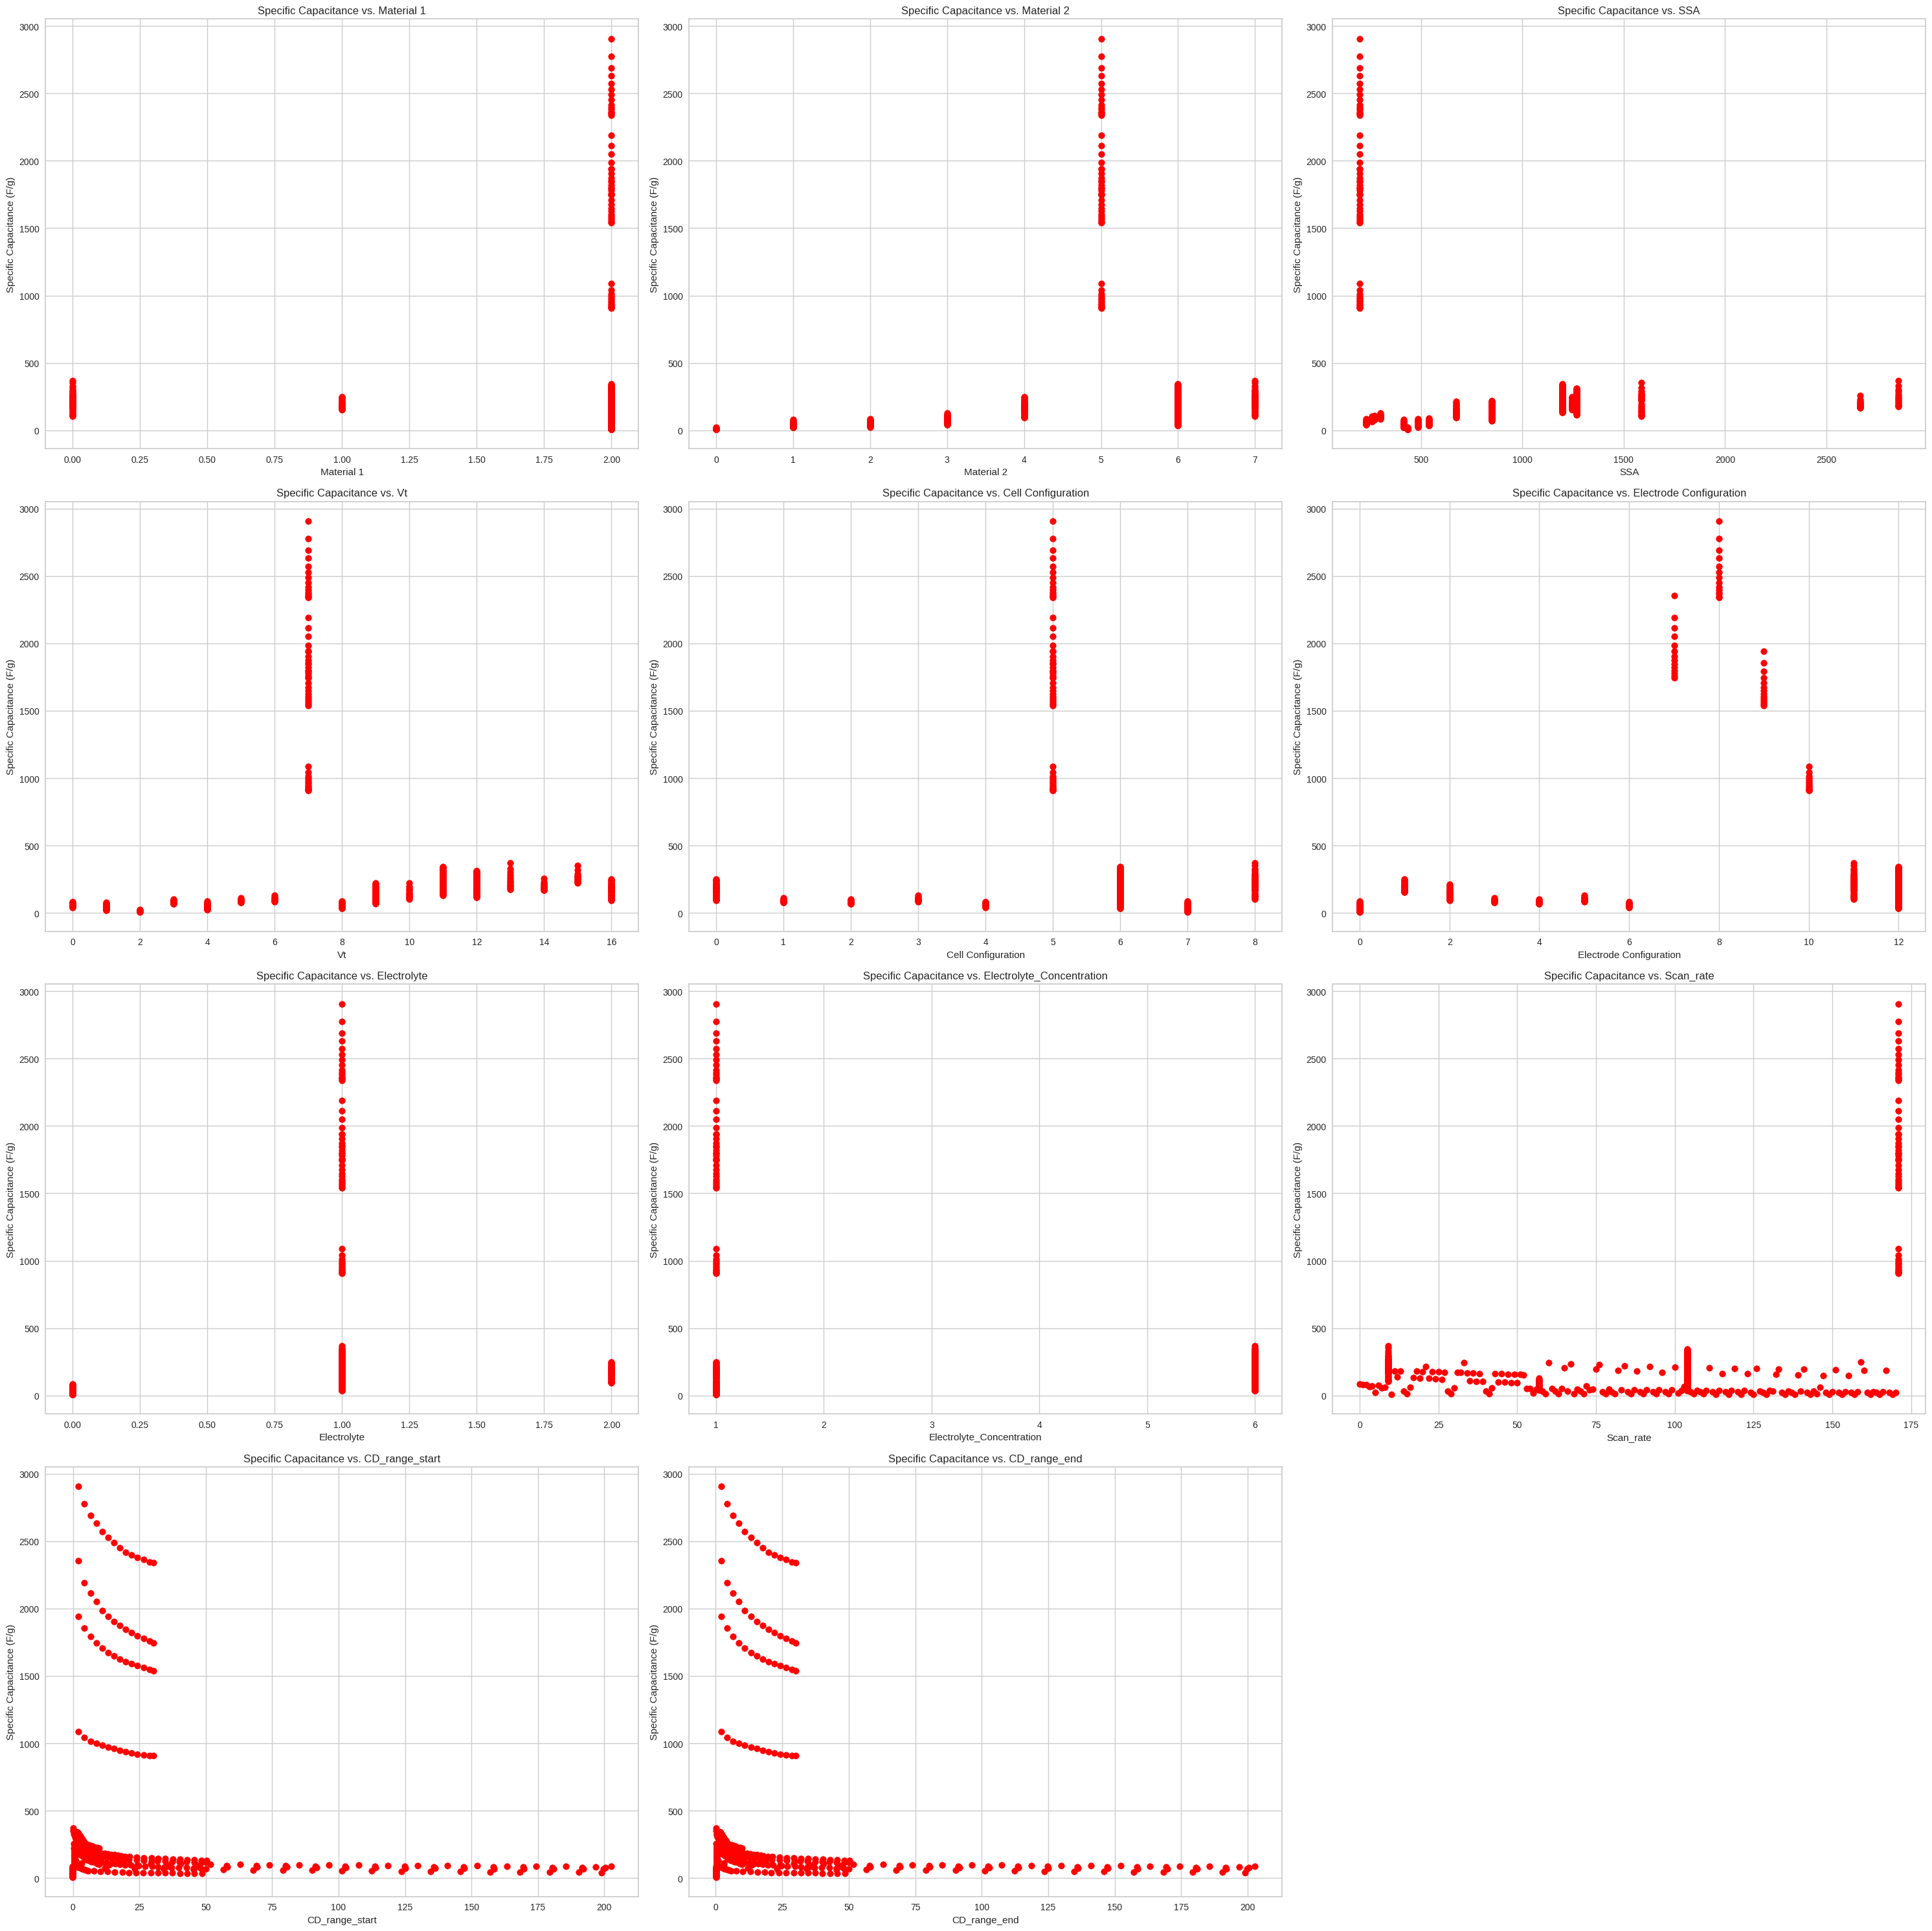

In [216]:
# List of columns to plot against "Specific Capacitance"
columns_to_plot = [
    'Material 1', 'Material 2', 'SSA', 'Vt', 'Cell Configuration',
    'Electrode Configuration', 'Electrolyte', 'Electrolyte_Concentration',
    'Scan_rate', 'CD_range_start', 'CD_range_end'
]

# Create subplots for all columns
fig, axes = plt.subplots(4, 3, figsize=(30, 30))
axes = axes.flatten()

# Plot each column
for i, col in enumerate(columns_to_plot):
    if df[col].dtype == 'object':  # Handle categorical columns
        df.groupby(col)['Specific_Capacitance'].mean().plot(kind='bar', ax=axes[i], color='skyblue')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Specific Capacitance (F/g)')
        axes[i].set_title(f'Specific Capacitance vs. {col}')
    else:  # Handle numerical columns
        axes[i].scatter(df[col], df['Specific_Capacitance'], color='red')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Specific Capacitance (F/g)')
        axes[i].set_title(f'Specific Capacitance vs. {col}')

# Remove extra subplots if any
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [217]:
X = df.drop(['Specific_Capacitance'],axis = 1)
X

,Material 1,Material 2,Current_density,SSA,Vt,Cell Configuration,Electrode Configuration,Rs,Electrolyte,Electrolyte_Concentration,Scan_rate,PW_range_start,PW_range_end,CD_range_start,CD_range_end
0,2,0,1,434.0,2,7,0,0.8,0,1,5,0.0,1.0,-0.18,0.18
1,2,0,1,434.0,2,7,0,0.8,0,1,55,0.0,1.0,-0.18,0.18
2,2,0,1,434.0,2,7,0,0.8,0,1,101,0.0,1.0,-0.18,0.18
3,2,0,1,434.0,2,7,0,0.8,0,1,145,0.0,1.0,-0.18,0.18
4,2,0,1,434.0,2,7,0,0.8,0,1,15,0.0,1.0,-0.18,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,2,3,77,230.4,0,4,6,0.7,1,6,57,-1.0,0.0,157.05,157.05
546,2,3,83,230.4,0,4,6,0.7,1,6,57,-1.0,0.0,168.21,168.21
547,2,3,89,230.4,0,4,6,0.7,1,6,57,-1.0,0.0,179.38,179.38
548,2,3,100,230.4,0,4,6,0.7,1,6,57,-1.0,0.0,190.54,190.54


In [218]:
X = df.drop(['Current_density'],axis = 1)
X

,Material 1,Material 2,SSA,Vt,Cell Configuration,Electrode Configuration,Rs,Electrolyte,Electrolyte_Concentration,Scan_rate,Specific_Capacitance,PW_range_start,PW_range_end,CD_range_start,CD_range_end
0,2,0,434.0,2,7,0,0.8,0,1,5,23.34,0.0,1.0,-0.18,0.18
1,2,0,434.0,2,7,0,0.8,0,1,55,19.39,0.0,1.0,-0.18,0.18
2,2,0,434.0,2,7,0,0.8,0,1,101,16.19,0.0,1.0,-0.18,0.18
3,2,0,434.0,2,7,0,0.8,0,1,145,15.13,0.0,1.0,-0.18,0.18
4,2,0,434.0,2,7,0,0.8,0,1,15,14.73,0.0,1.0,-0.18,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,2,3,230.4,0,4,6,0.7,1,6,57,45.76,-1.0,0.0,157.05,157.05
546,2,3,230.4,0,4,6,0.7,1,6,57,44.73,-1.0,0.0,168.21,168.21
547,2,3,230.4,0,4,6,0.7,1,6,57,43.69,-1.0,0.0,179.38,179.38
548,2,3,230.4,0,4,6,0.7,1,6,57,42.66,-1.0,0.0,190.54,190.54


In [219]:
Y = df.Specific_Capacitance
Y

,Specific_Capacitance
0,23.34
1,19.39
2,16.19
3,15.13
4,14.73
...,...
545,45.76
546,44.73
547,43.69
548,42.66


In [220]:
categorical_cols = X.select_dtypes(include='object').columns
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col, encoder in label_encoders.items():
    X[col] = encoder.fit_transform(X[col].astype(str))


In [221]:
X

,Material 1,Material 2,SSA,Vt,Cell Configuration,Electrode Configuration,Rs,Electrolyte,Electrolyte_Concentration,Scan_rate,Specific_Capacitance,PW_range_start,PW_range_end,CD_range_start,CD_range_end
0,2,0,434.0,2,7,0,0.8,0,1,5,23.34,0.0,1.0,-0.18,0.18
1,2,0,434.0,2,7,0,0.8,0,1,55,19.39,0.0,1.0,-0.18,0.18
2,2,0,434.0,2,7,0,0.8,0,1,101,16.19,0.0,1.0,-0.18,0.18
3,2,0,434.0,2,7,0,0.8,0,1,145,15.13,0.0,1.0,-0.18,0.18
4,2,0,434.0,2,7,0,0.8,0,1,15,14.73,0.0,1.0,-0.18,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,2,3,230.4,0,4,6,0.7,1,6,57,45.76,-1.0,0.0,157.05,157.05
546,2,3,230.4,0,4,6,0.7,1,6,57,44.73,-1.0,0.0,168.21,168.21
547,2,3,230.4,0,4,6,0.7,1,6,57,43.69,-1.0,0.0,179.38,179.38
548,2,3,230.4,0,4,6,0.7,1,6,57,42.66,-1.0,0.0,190.54,190.54


In [222]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Apply MinMaxScaler
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the scaled DataFrame
print("Scaled DataFrame:")
print(df_scaled)
df_scaled = df

Scaled DataFrame:
     Material 1  Material 2  Current_density       SSA     Vt  \
0           1.0    0.000000         0.002933  0.088789  0.125   
1           1.0    0.000000         0.002933  0.088789  0.125   
2           1.0    0.000000         0.002933  0.088789  0.125   
3           1.0    0.000000         0.002933  0.088789  0.125   
4           1.0    0.000000         0.002933  0.088789  0.125   
..          ...         ...              ...       ...    ...   
545         1.0    0.428571         0.225806  0.012190  0.000   
546         1.0    0.428571         0.243402  0.012190  0.000   
547         1.0    0.428571         0.260997  0.012190  0.000   
548         1.0    0.428571         0.293255  0.012190  0.000   
549         1.0    0.428571         0.304985  0.012190  0.000   

     Cell Configuration  Electrode Configuration        Rs  Electrolyte  \
0                 0.875                      0.0  0.007007          0.0   
1                 0.875                      0.0  0

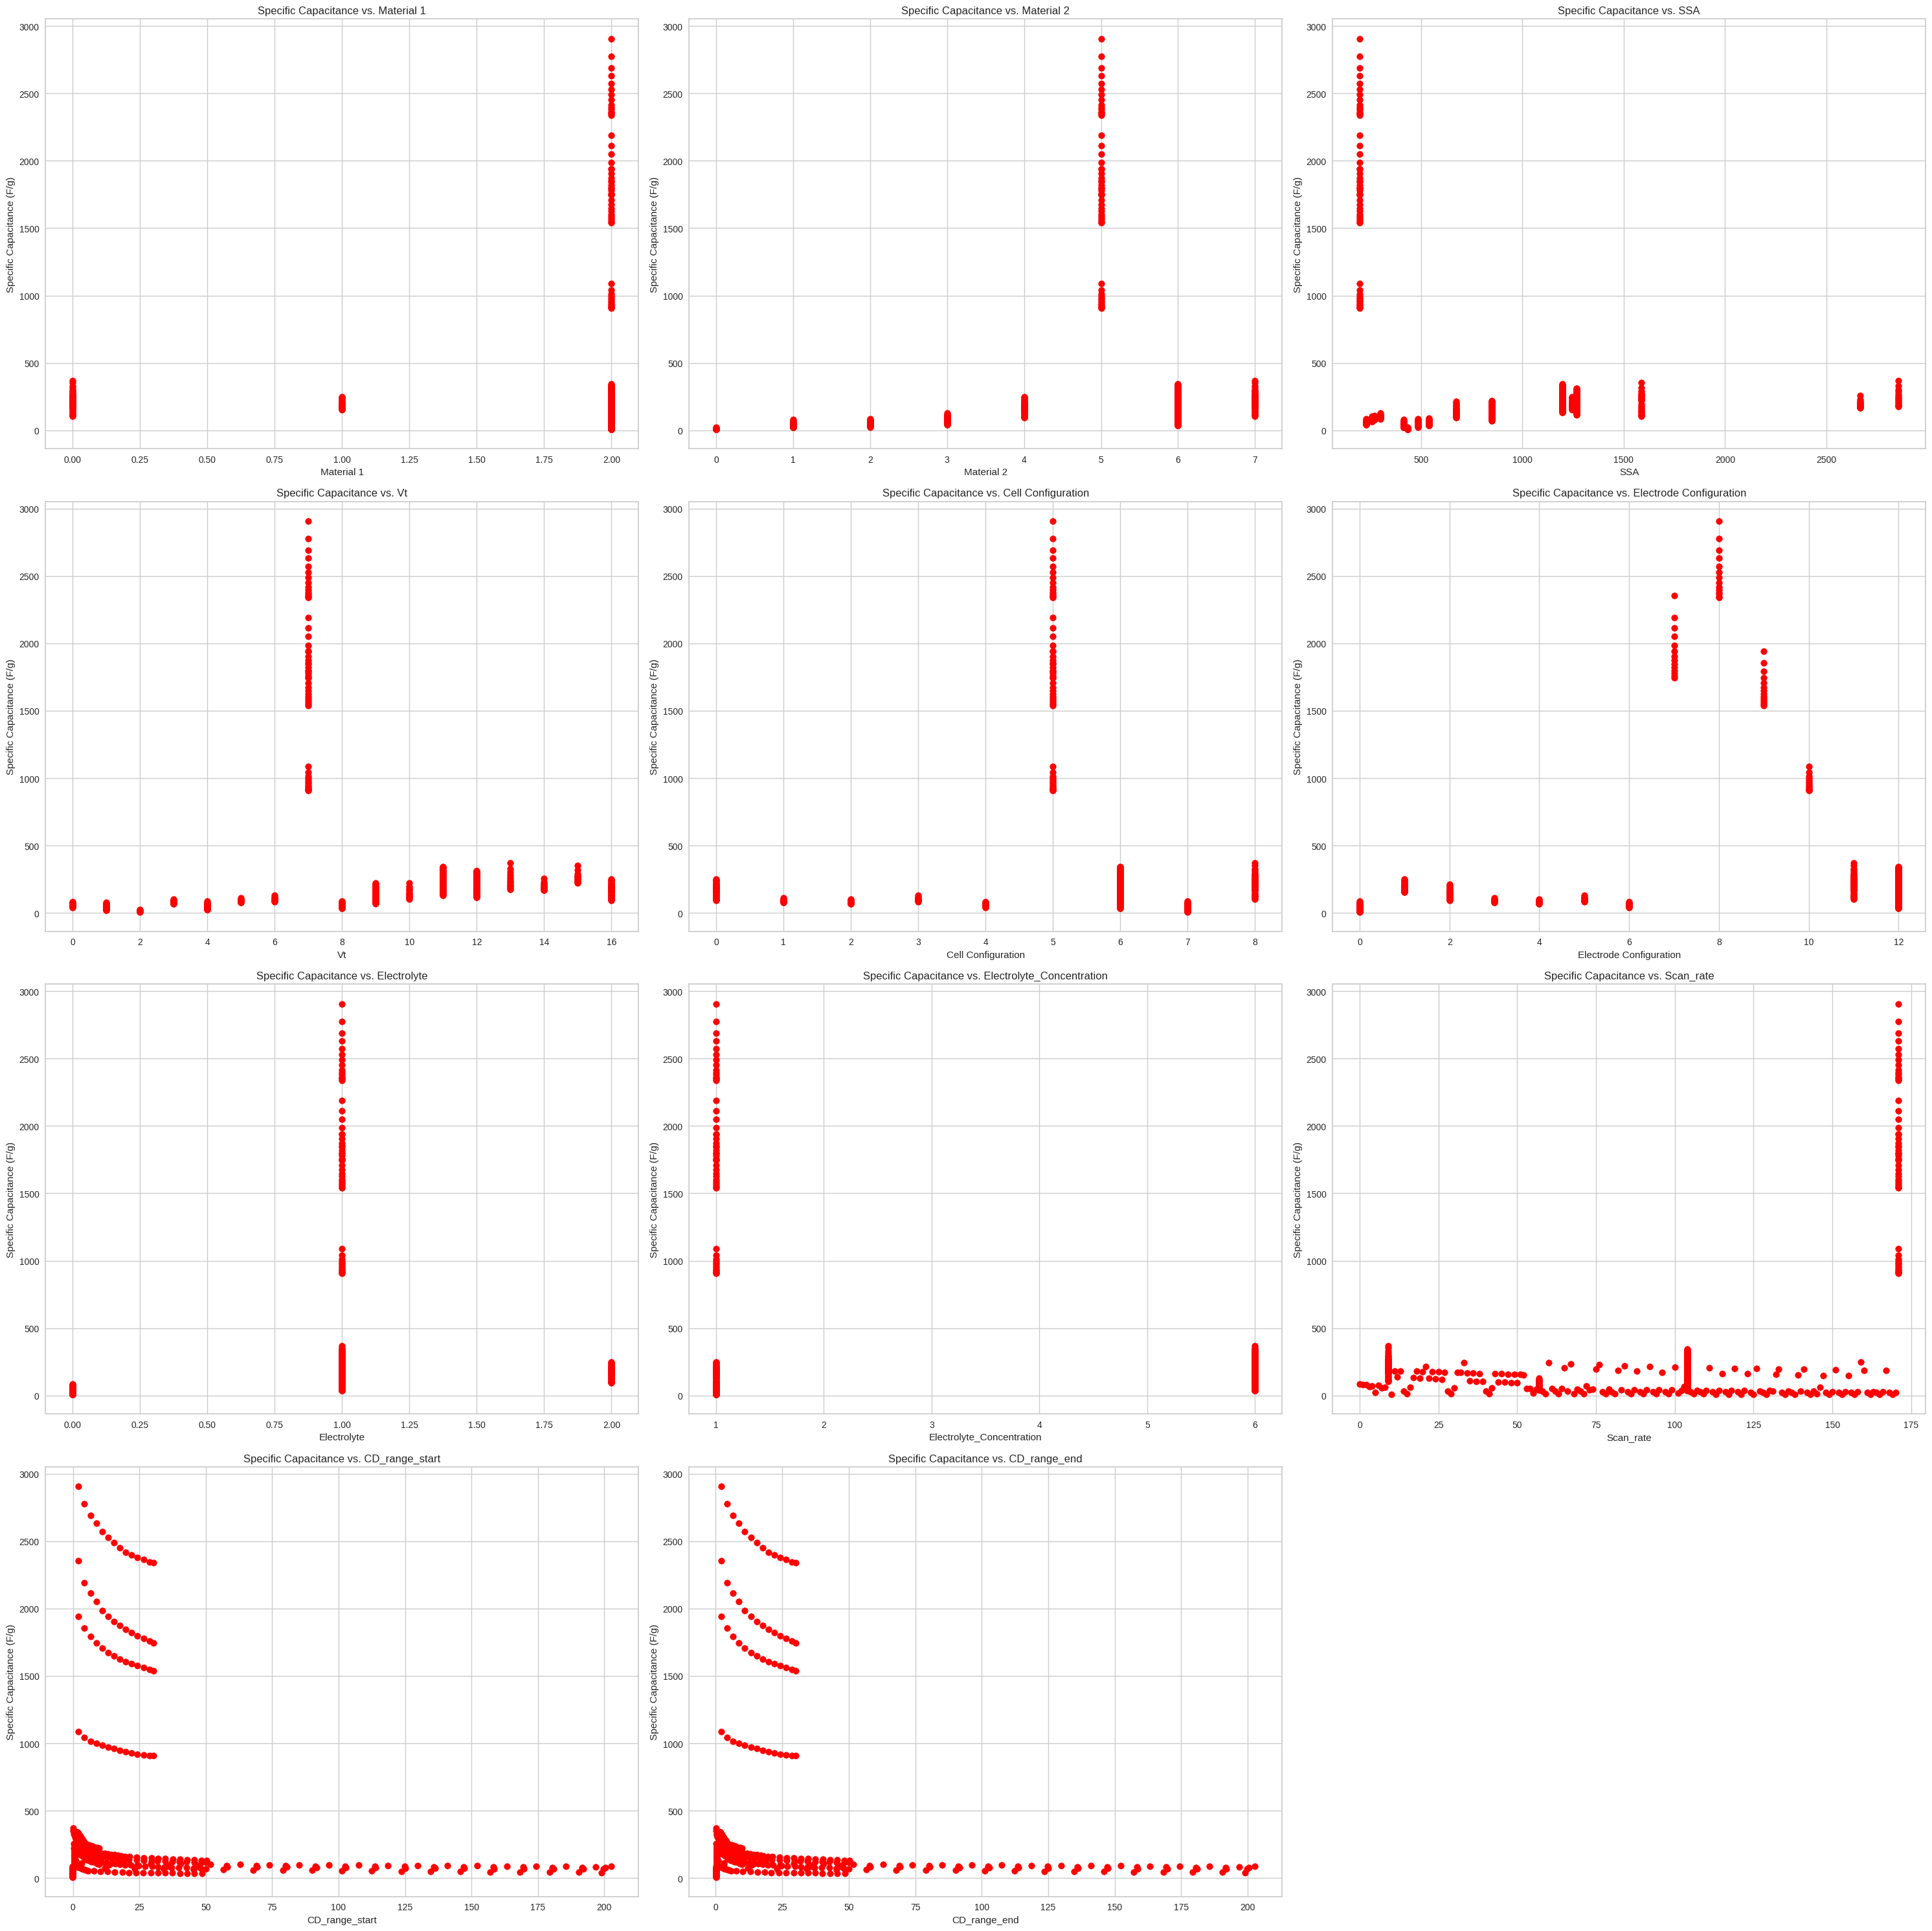

In [223]:
# List of columns to plot against "Specific Capacitance"
columns_to_plot = [
    'Material 1', 'Material 2', 'SSA', 'Vt', 'Cell Configuration',
    'Electrode Configuration', 'Electrolyte', 'Electrolyte_Concentration',
    'Scan_rate', 'CD_range_start', 'CD_range_end'
]

# Create subplots for all columns
fig, axes = plt.subplots(4, 3, figsize=(30, 30))
axes = axes.flatten()

# Plot each column
for i, col in enumerate(columns_to_plot):
    if df[col].dtype == 'object':  # Handle categorical columns
        df.groupby(col)['Specific_Capacitance'].mean().plot(kind='bar', ax=axes[i], color='skyblue')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Specific Capacitance (F/g)')
        axes[i].set_title(f'Specific Capacitance vs. {col}')
    else:  # Handle numerical columns
        axes[i].scatter(df[col], df['Specific_Capacitance'], color='red')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Specific Capacitance (F/g)')
        axes[i].set_title(f'Specific Capacitance vs. {col}')

# Remove extra subplots if any
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [225]:
X_train

,Material 1,Material 2,SSA,Vt,Cell Configuration,Electrode Configuration,Rs,Electrolyte,Electrolyte_Concentration,Scan_rate,Specific_Capacitance,PW_range_start,PW_range_end,CD_range_start,CD_range_end
482,2,3,258.4,3,2,4,0.40,1,6,57,75.940000,-1.0,0.0,113.920000,113.920000
158,2,6,1269.1,12,6,12,1.07,1,6,104,124.611237,-0.8,1.0,34.568430,34.568430
15,2,0,434.0,2,7,0,0.80,0,1,94,11.600000,0.0,1.0,-0.180000,0.180000
334,1,4,1244.0,16,0,1,100.00,2,1,52,153.640000,0.1,0.8,0.500000,0.500000
39,2,1,415.0,1,7,0,0.76,0,1,53,53.690000,0.0,1.0,-0.190000,0.190000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2,1,415.0,1,7,0,0.76,0,1,161,22.470000,0.0,1.0,-0.190000,0.190000
106,2,2,485.0,4,7,0,0.69,0,1,163,26.280000,0.0,1.0,-0.170000,0.170000
270,2,6,850.1,9,6,12,1.07,1,6,104,78.014548,-0.8,1.0,39.903546,39.903546
435,2,5,198.0,7,5,8,6.00,1,1,171,2529.360000,0.0,0.6,13.190000,13.190000


In [226]:
y_train

,Specific_Capacitance
482,75.940000
158,124.611237
15,11.600000
334,153.640000
39,53.690000
...,...
71,22.470000
106,26.280000
270,78.014548
435,2529.360000


In [227]:
X_test

,Material 1,Material 2,SSA,Vt,Cell Configuration,Electrode Configuration,Rs,Electrolyte,Electrolyte_Concentration,Scan_rate,Specific_Capacitance,PW_range_start,PW_range_end,CD_range_start,CD_range_end
195,2,6,1197.3,11,6,12,1.07,1,6,104,229.051074,-0.8,1.0,5.598319,5.598319
79,2,2,485.0,4,7,0,0.69,0,1,146,63.220000,0.0,1.0,-0.170000,0.170000
480,2,3,258.4,3,2,4,0.40,1,6,57,79.980000,-1.0,0.0,91.600000,91.600000
109,2,6,1269.1,12,6,12,1.07,1,6,104,311.463258,-0.8,1.0,1.519698,1.519698
522,2,3,299.4,6,3,5,0.68,1,6,57,93.100000,-1.0,0.0,129.810000,129.810000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,2,3,230.4,0,4,6,0.70,1,6,57,49.170000,-1.0,0.0,134.730000,134.730000
140,2,6,1269.1,12,6,12,1.07,1,6,104,181.195818,-0.8,1.0,5.023330,5.023330
371,0,7,1588.0,10,8,11,0.10,1,6,9,108.270000,-0.9,1.0,9.070000,9.070000
18,2,0,434.0,2,7,0,0.80,0,1,109,10.790000,0.0,1.0,-0.180000,0.180000


In [228]:
y_test

,Specific_Capacitance
195,229.051074
79,63.220000
480,79.980000
109,311.463258
522,93.100000
...,...
543,49.170000
140,181.195818
371,108.270000
18,10.790000


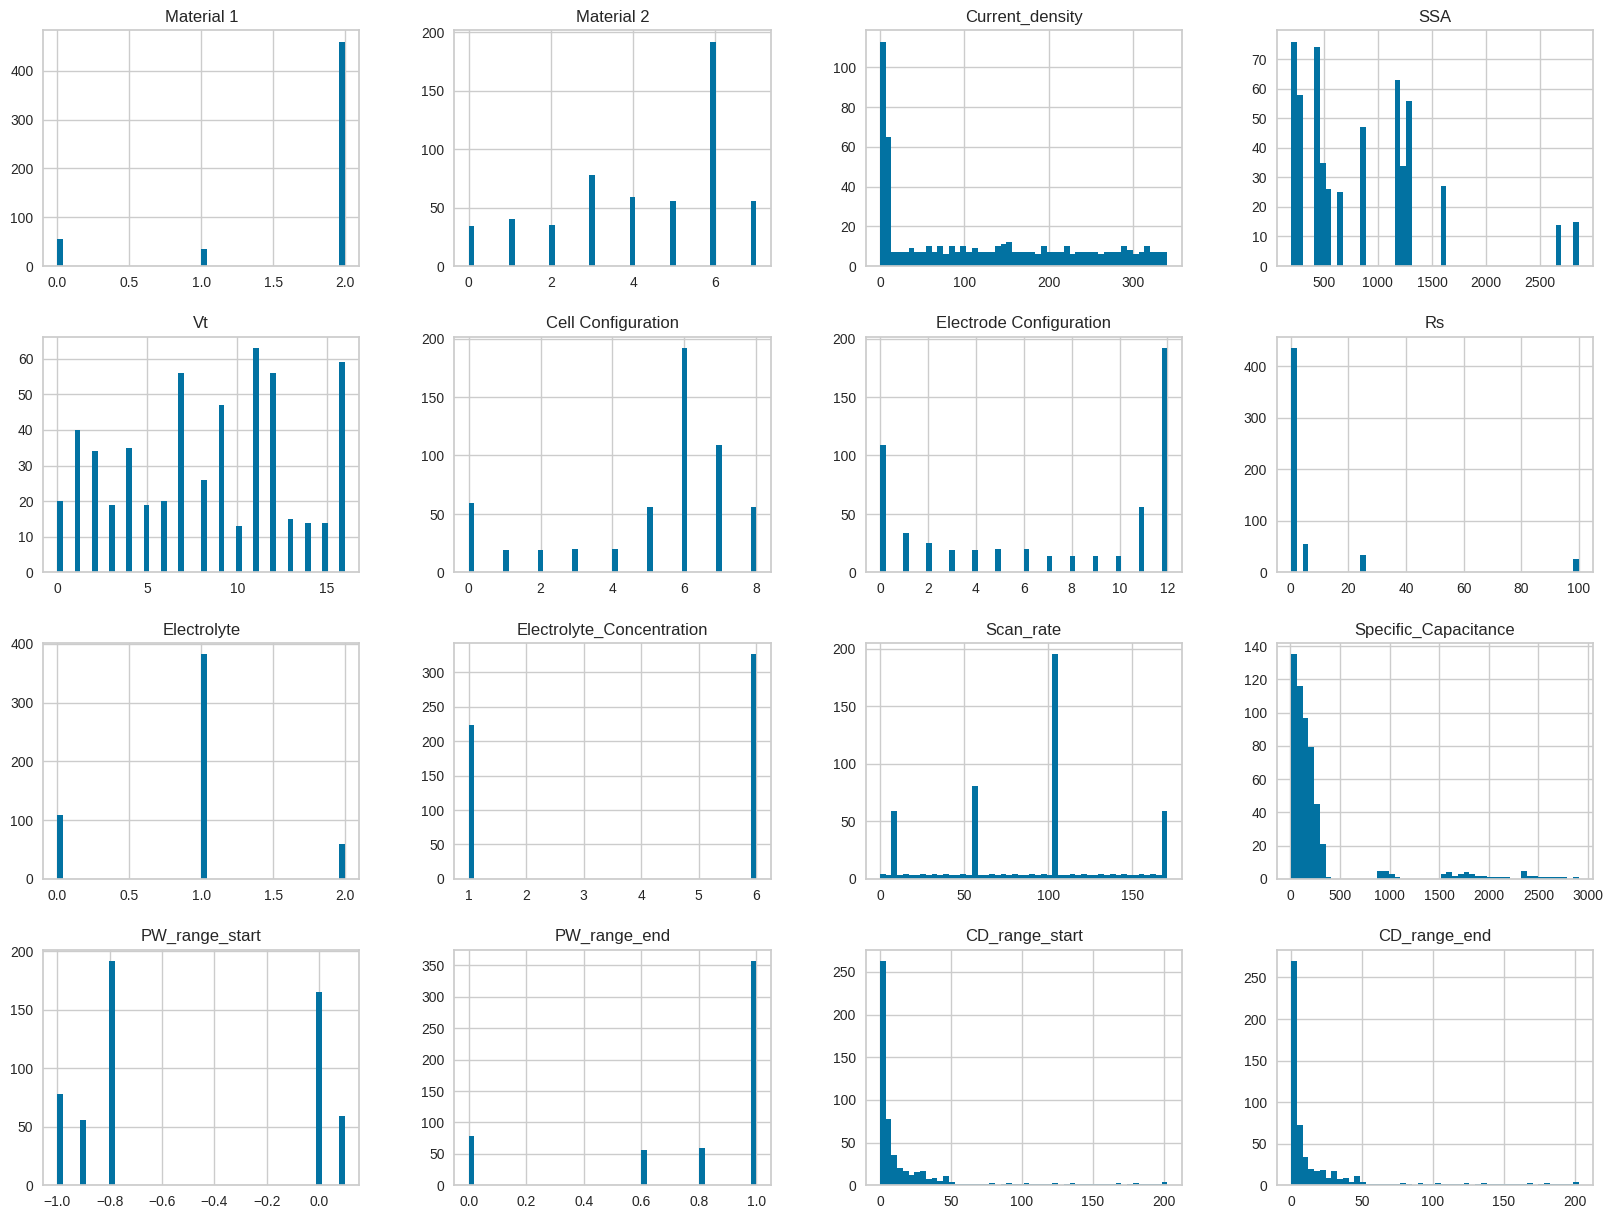

In [229]:
df.hist(bins = 50, figsize=(20,15))
plt.show()

In [230]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import matplotlib.pyplot as plt


**Initiation of Randorm Forest Regressor**

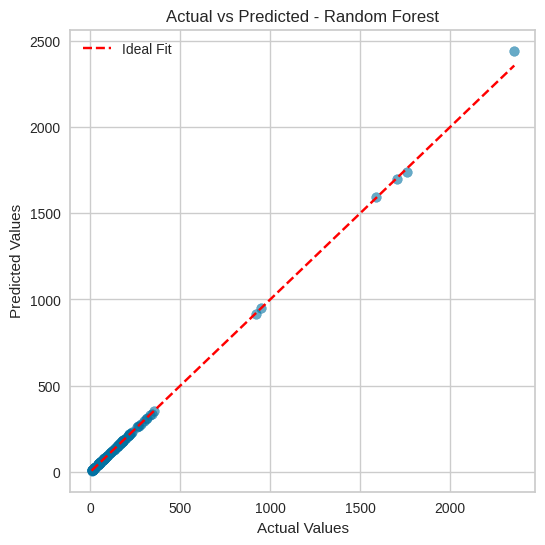

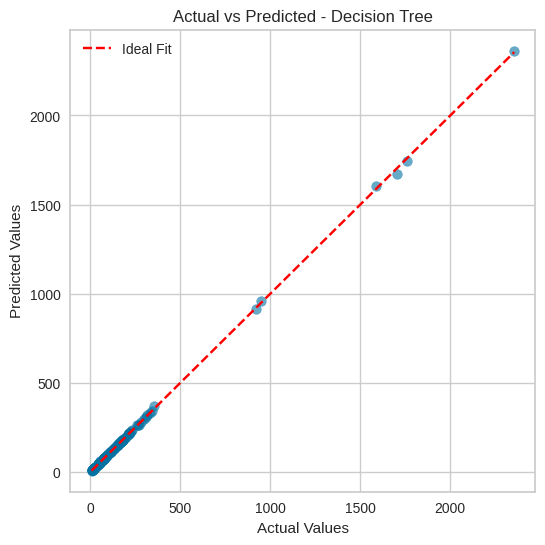

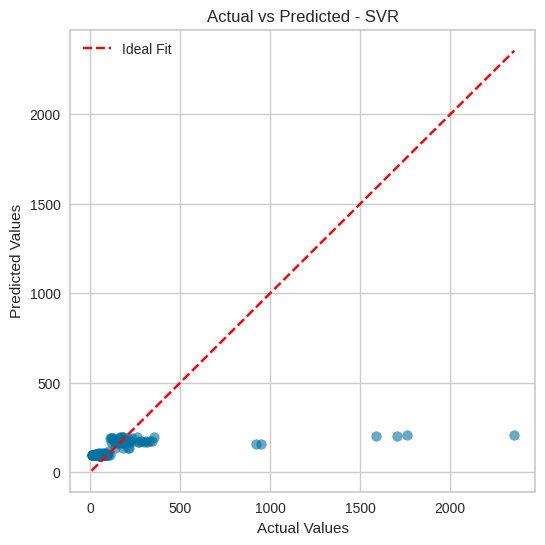

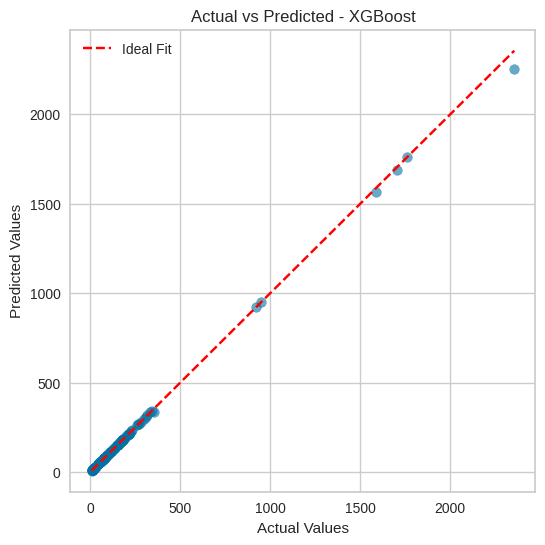

Model Evaluation Results:
           Model        RMSE        R2         MAE       EVS
0  Random Forest    8.534291  0.999420    1.821944  0.999421
1  Decision Tree    4.519379  0.999837    1.810638  0.999837
2            SVR  341.256937  0.071995  120.398809  0.102566
3        XGBoost   10.310102  0.999153    2.688872  0.999172


In [234]:
# Define a function to evaluate models
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    ema = mean_absolute_error(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)
    return rmse, r2, ema, evs

# Function to create scatter plots
def scatter_plot(y_true, y_pred, model_name):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label='Ideal Fit')
    plt.title(f'Actual vs Predicted - {model_name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

# Prepare results dataframe
results = pd.DataFrame(columns=['Model', 'RMSE', 'R2', 'MAE', 'EVS'])

# Models and their initialization
models = {
    'Random Forest': RandomForestRegressor(random_state=SEED),
    'Decision Tree': DecisionTreeRegressor(random_state=SEED),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(random_state=SEED)
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    rmse, r2, ema, evs = evaluate_model(y_test, y_pred)
    # Append results as a new row using pd.concat
    new_row = pd.DataFrame([{'Model': model_name, 'RMSE': rmse, 'R2': r2, 'MAE': ema, 'EVS': evs}])
    results = pd.concat([results, new_row], ignore_index=True)


    # Scatter plot
    scatter_plot(y_test, y_pred, model_name)

# Display results
print("Model Evaluation Results:")
print(results)


In [156]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=23)

In [157]:
y_train_pred = model.predict(X_train)

In [158]:
print(y_train_pred)

[  75.86599895  124.91828042   11.5802      153.60037344   53.65559392
   28.8756       63.13532989   32.5849       39.07883707   83.17556901
  172.97361852   98.17691402   95.73120479  147.19296985   41.93061992
   66.94320106 1944.123       152.27457101  198.906269    213.68024403
   98.71472804  196.10791209  202.81010053  196.0564963    23.1916
  102.27321306   99.02138505 2452.6452      278.05831101  251.43426197
  243.59193461  135.35595678  193.99004714  302.8126014    58.32148763
  228.15286467   88.9552      175.88509798   70.29115818  196.54800929
  135.86052301  176.26480179  103.1053       10.5223      189.47699298
   27.4896      285.85408171   66.22718867  223.61708271  911.3973
  115.61808036   67.96560106  240.08753009    9.5726       41.02853092
   41.87186185  129.52107092   92.55301714  913.2861      188.15053241
  181.03535541  133.11483008  243.85884647   46.69657599  231.30636105
  309.35412486    8.5186      296.88553951  235.27220679  313.32510799
  182.92718333

In [159]:
predictions1 = pd.DataFrame({'Y_train' : y_train, 'Y_train_pred' : y_train_pred, 'Difference' : y_train - y_train_pred})

In [160]:
predictions1

,Y_train,Y_train_pred,Difference
482,75.940000,75.865999,0.074001
158,124.611237,124.918280,-0.307044
15,11.600000,11.580200,0.019800
334,153.640000,153.600373,0.039627
39,53.690000,53.655594,0.034406
...,...,...,...
71,22.470000,22.845100,-0.375100
106,26.280000,26.156700,0.123300
270,78.014548,78.460596,-0.446049
435,2529.360000,2518.824300,10.535700


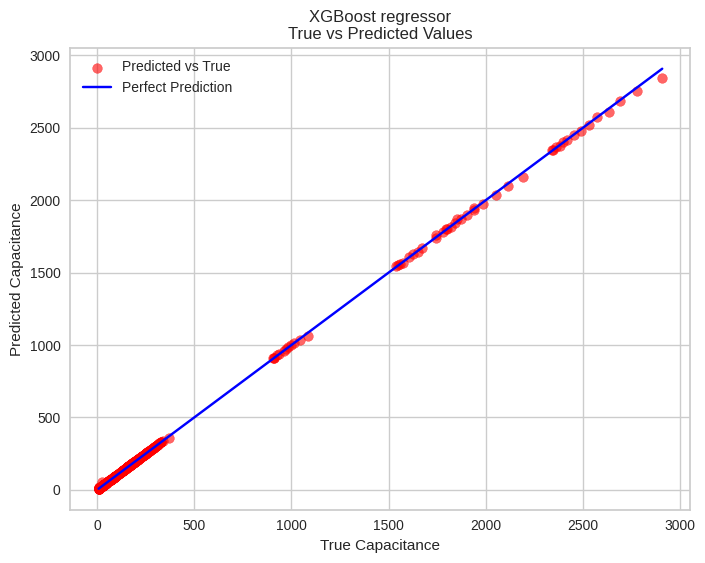

Mean Squared Error (MSE): 22.297560027563932
R-squared (R²): 0.9999312425044841


In [161]:
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='red', alpha=0.6, label='Predicted vs True')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='blue', label='Perfect Prediction')
plt.title('XGBoost regressor\nTrue vs Predicted Values')
plt.xlabel('True Capacitance')
plt.ylabel('Predicted Capacitance')
plt.legend()
plt.grid(True)
plt.show()

# Print metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

In [162]:
len(y_train_pred)

440

In [163]:
print('The training r_sq is: %.4f'% model.score(X_train, y_train))

The training r_sq is: 0.9999


In [164]:
print('The MAE is: %.4f'% mean_absolute_error(y_train, y_train_pred))

The MAE is: 1.1847


In [165]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(y_train, y_train_pred)))

The RMSE is: 4.7220


In [166]:
print('The EVS is: %.4f'% explained_variance_score(y_train, y_train_pred))

The EVS is: 0.9999


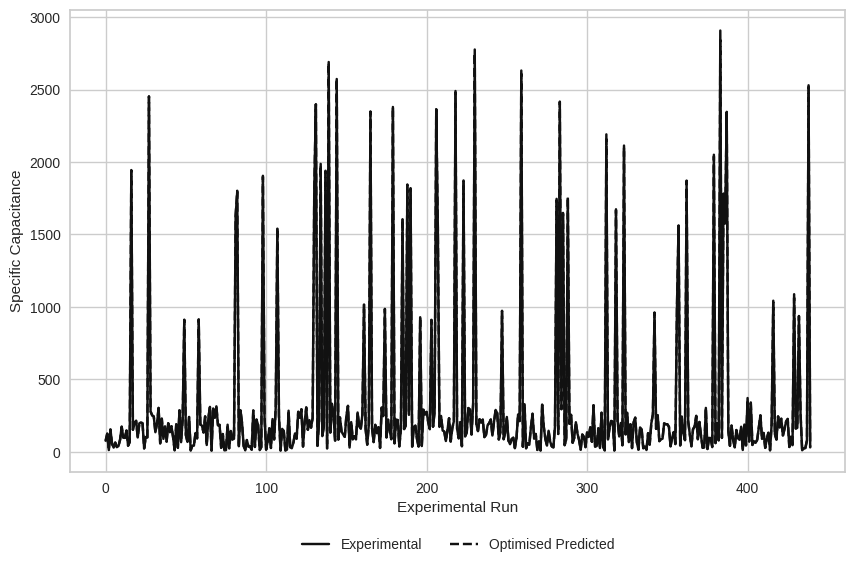

In [167]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_train))
plt.plot(x_ax, y_train, label = 'Experimental', color = 'k', linestyle = '-')
plt.plot(x_ax, y_train_pred, label = 'Optimised Predicted', color = 'k', linestyle = '--')
plt.ylabel('Specific Capacitance')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

In [168]:
y_test_pred = model.predict(X_test)

In [169]:
y_test_pred

array([ 227.8580707 ,   62.92331727,   79.80766662,  310.03283153,
         92.72429842,   69.69168886,   49.11121986,  128.58115951,
        216.80581641,  162.05383497,  268.96877972,   14.6207    ,
         22.8451    ,  146.32203762,   77.09072413,   53.74492278,
        180.7479872 ,   14.6486    ,  151.48034317, 1697.9099    ,
        212.11186489,  333.12525178,  916.7788    ,  315.24958187,
         59.00392581,   45.43593999,  266.55213991,   42.42470445,
         81.12783037,   80.46284432,  140.90387756,   77.94559607,
        164.46922599,   22.8451    ,  152.07588526,   76.31315433,
         14.4371    ,  336.51271362, 2441.195     , 1738.4245    ,
        213.85566876,  180.85270043,  105.32758216,   71.14768952,
        135.77923915,  166.80935377,   94.22364224,   78.46803291,
         70.26288037,  110.69105611,  234.09632447,   23.1034    ,
        177.52454657,  115.6673029 ,  180.69736542,   27.8975    ,
         59.04102013,   53.65054797,   46.76436059, 1593.8092 

In [170]:
len(y_test_pred)

110

In [171]:
predictions2 = pd.DataFrame({'y_test' : y_test, 'y_test_pred' : y_test_pred})

In [172]:
predictions2

,y_test,y_test_pred
195,229.051074,227.858071
79,63.220000,62.923317
480,79.980000,79.807667
109,311.463258,310.032832
522,93.100000,92.724298
...,...,...
543,49.170000,48.814821
140,181.195818,180.318186
371,108.270000,108.631486
18,10.790000,10.792300


In [173]:
print('The testing r_sq is: %.4f'% r2_score(y_test, y_test_pred))

The testing r_sq is: 0.9994


In [174]:
print('The testing r_sq is: %.4f'% model.score(X_test, y_test))

The testing r_sq is: 0.9994


In [175]:
print('The MAE is: %.4f'% mean_absolute_error(y_test, y_test_pred))

The MAE is: 1.8219


In [176]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(y_test, y_test_pred)))

The RMSE is: 8.5343


In [177]:
print('The EVS is: %.4f'% explained_variance_score(y_test, y_test_pred))


The EVS is: 0.9994


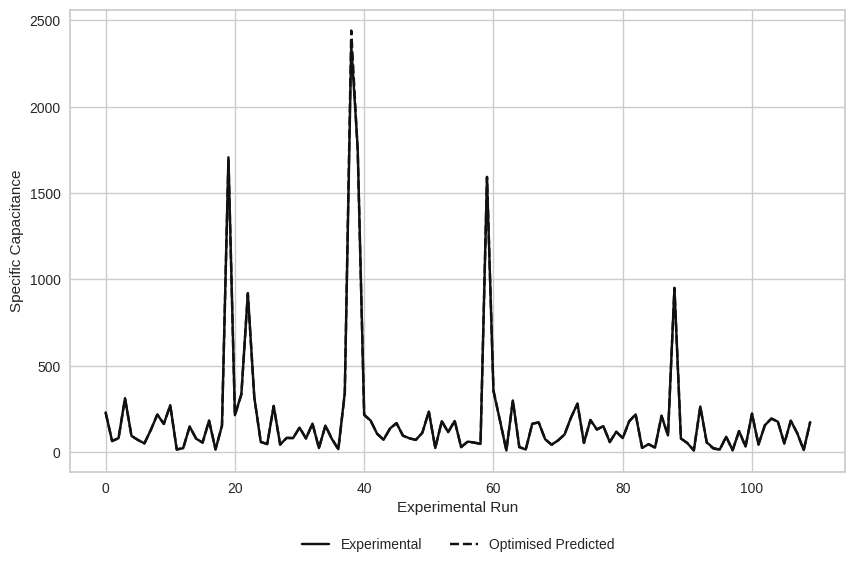

In [178]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_test))
plt.plot(x_ax, y_test, label = 'Experimental', color = 'k', linestyle = '-')
plt.plot(x_ax, y_test_pred, label = 'Optimised Predicted', color = 'k', linestyle = '--')
plt.ylabel('Specific Capacitance')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

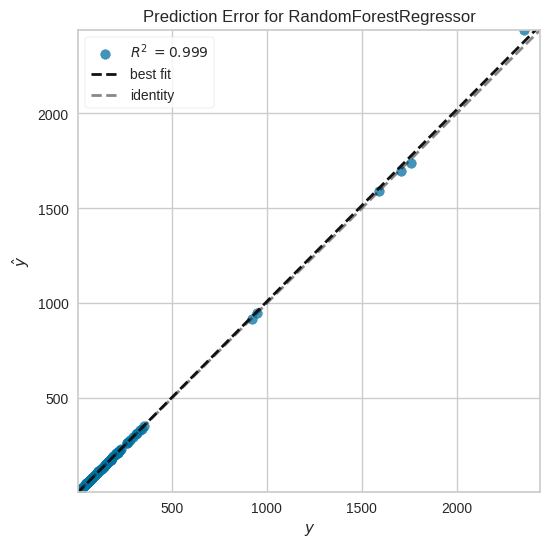

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [179]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

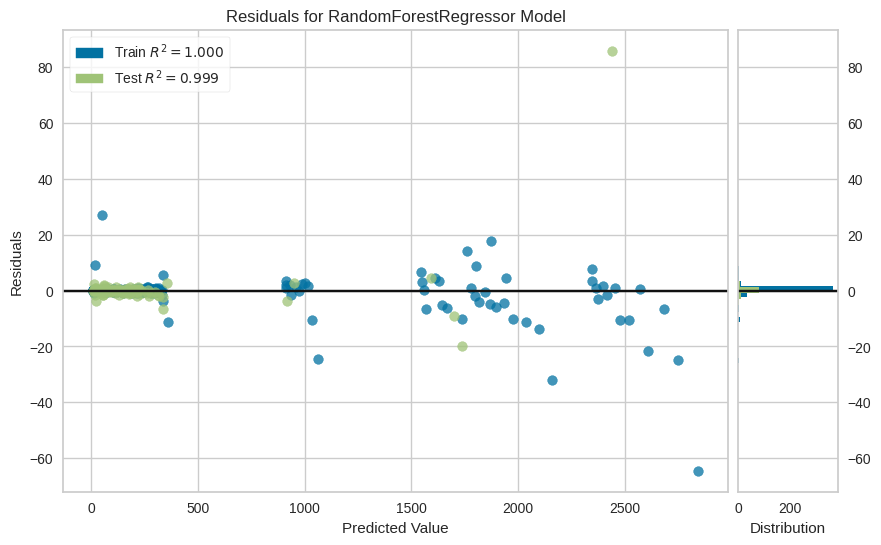

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [180]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [181]:
model.score(X_test, y_test)

0.9994196069333724

In [182]:
MSE_test = round(np.mean(np.square(y_test - y_test_pred)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

8.53

In [183]:
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error


In [75]:
model = XGBRegressor()


In [76]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [101]:
features = list(X_train.columns)

In [102]:
RFR = RandomForestRegressor(random_state=SEED)

In [106]:
importance = model.feature_importances_
importance

array([3.95894069e-07, 5.80269437e-06, 3.04201942e-02, 2.92374644e-07,
       6.93903777e-08, 5.70859436e-04, 5.11713494e-06, 1.90425948e-08,
       2.01051309e-08, 1.26942754e-02, 9.54793030e-01, 1.28042390e-07,
       2.92641099e-08, 6.49999032e-04, 8.59767743e-04])

In [107]:
FIM = pd.DataFrame({'features' : features, 'feature_importances' : importance})
FIM

,features,feature_importances
0,Material 1,3.958941e-07
1,Material 2,5.802694e-06
2,SSA,3.042019e-02
3,Vt,2.923746e-07
4,Cell Configuration,6.939038e-08
5,Electrode Configuration,5.708594e-04
6,Rs,5.117135e-06
7,Electrolyte,1.904259e-08
8,Electrolyte_Concentration,2.010513e-08
9,Scan_rate,1.269428e-02


**Using Different Hyperparameters**

<Figure size 8000x4800 with 0 Axes>

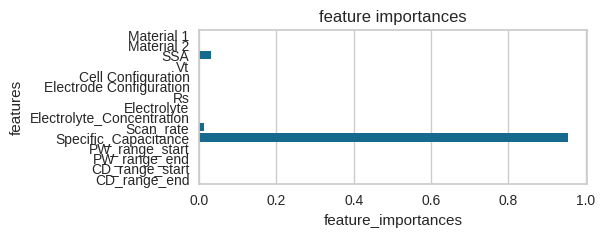

In [108]:
fig = plt.figure(dpi=800)
plt.figure(figsize=(5,2))
plt.title('feature importances')
sns.barplot(y='features', x='feature_importances', data=FIM)
plt.show()

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Retrieve the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print("Test set R² score:", accuracy)


Test set R² score: 0.9996980704865785
